In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)
tf.reset_default_graph()

tf.name_scope('input')
keep_prob = tf.placeholder(tf.float32)
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.get_variable("W1", shape = [784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


W2 = tf.get_variable("W2", shape = [512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

tf.name_scope('hidden2')
W3 = tf.get_variable("W3", shape = [512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

tf.name_scope('hidden3')
W4 = tf.get_variable("W4", shape = [512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

tf.name_scope('output')
W5 = tf.get_variable("W5", shape = [512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([nb_classes]))

tf.name_scope('hypothesis')
hypothesis = tf.matmul(L4, W5) + b5

tf.name_scope('cost')
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)


is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
training_epochs = 15
batch_size = 100


sess = tf.Session()

writer = tf.summary.FileWriter('/path/to/mnist', sess.graph)
sess.run(tf.global_variables_initializer())


#result = sess.run([merged])

for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys, keep_prob : 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))



print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X : mnist.test.images, Y: mnist.test.labels, keep_prob : 1}))


Epoch: 0001 cost =  0.488523880
Epoch: 0002 cost =  0.172580790
Epoch: 0003 cost =  0.130693952
Epoch: 0004 cost =  0.109483419
Epoch: 0005 cost =  0.096108535
Epoch: 0006 cost =  0.083597314
Epoch: 0007 cost =  0.075778903
Epoch: 0008 cost =  0.071930326
Epoch: 0009 cost =  0.063242658
Epoch: 0010 cost =  0.058088577
Epoch: 0011 cost =  0.055894105
Epoch: 0012 cost =  0.053970337
Epoch: 0013 cost =  0.046820576
Epoch: 0014 cost =  0.049665870
Epoch: 0015 cost =  0.046387820
Accuracy:  0.9805


Label :  [6]
Prediction :  [6]


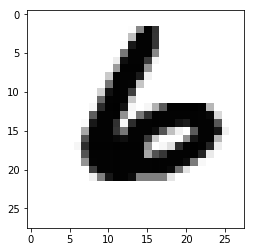

In [4]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X : mnist.test.images[r: r + 1], keep_prob : 1}))

plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
plt.show()
